# Dự đoán giá xe ô tô

* Trực quan hoá dữ liệu

In [29]:
# cac ham duoc su dung

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import wordcloud as wc

In [30]:
# load file du lieu

dataset = pd.read_csv('cars_data_processed.csv', sep = '\t')
# dataset.to_csv('new.csv')
# xoa cac thuoc tinh khong su dung
del dataset['Unnamed: 0']
del dataset['numberOfAxles']
dataset.head()

,name,brand,price,length,height,width,weightTotal,modelDate,fuelType,numberOfDoors,numberOfForwardGears,seatingCapacity,vehicleTransmission,cargoVolume,roofLoad,accelerationTime,fuelCapacity,speed,payload,trailerWeight,vEengineType,vEengineDisplacement,torque
0,Subaru SVX,Subaru,53.090,4625,1300,1770,2045,1992,gasoline,3,4,5,Automatic,466.0,50,8.6,3319,235,435,1610,fuel engine,3319,309
1,Subaru Impreza 2.5 WRX STi AWD,Subaru,52.285,4465,1440,1740,1900,2005,gasoline,4,6,5,Manual transmission,395.0,80,5.4,2457,255,430,1470,fuel engine,2457,392
2,Subaru Impreza 2.0R AWD,Subaru,26.565,4465,1440,1740,1780,2005,gasoline,4,5,5,Manual transmission,401.0,80,8.8,1994,210,490,1290,fuel engine,1994,186
3,Subaru Impreza 2.0R AWD,Subaru,28.565,4465,1440,1740,1780,2005,gasoline,4,4,5,Automatic,401.0,80,11.6,1994,191,450,1330,fuel engine,1994,186
4,Subaru Impreza 2.5 WRX AWD,Subaru,33.785,4465,1440,1740,1860,2005,gasoline,4,5,5,Manual transmission,401.0,80,5.9,2457,230,480,1380,fuel engine,2457,320


In [5]:
# mo ta kich thuoc cua du lieu

dataset.shape

(12913, 23)

In [6]:
# mo ta cac thuoc tinh cua du lieu

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12913 entries, 0 to 12912
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  12913 non-null  object 
 1   brand                 12913 non-null  object 
 2   price                 12913 non-null  float64
 3   length                12913 non-null  int64  
 4   height                12913 non-null  int64  
 5   width                 12913 non-null  int64  
 6   weightTotal           12913 non-null  int64  
 7   modelDate             12913 non-null  int64  
 8   fuelType              12913 non-null  object 
 9   numberOfDoors         12913 non-null  int64  
 10  numberOfForwardGears  12913 non-null  int64  
 11  seatingCapacity       12913 non-null  object 
 12  vehicleTransmission   12913 non-null  object 
 13  cargoVolume           12913 non-null  float64
 14  roofLoad              12913 non-null  int64  
 15  accelerationTime   

In [7]:
# mo ta cac thong ke co ban cua du lieu

dataset.describe()

,price,length,height,width,weightTotal,modelDate,numberOfDoors,numberOfForwardGears,cargoVolume,roofLoad,accelerationTime,fuelCapacity,speed,payload,trailerWeight,vEengineDisplacement,torque
count,12913.000000,12913.000000,12913.000000,12913.000000,12913.000000,12913.000000,12913.000000,12913.000000,12913.000000,12913.000000,12913.000000,12913.000000,12913.000000,12913.000000,12913.000000,12913.000000,12913.000000
mean,29.864724,4380.602029,1528.932626,1762.521103,1904.785642,2005.118563,4.420971,5.497948,1453.257802,76.537598,11.525920,1739.311934,190.497096,608.541857,1296.243785,1739.311934,223.906296
std,16.195003,357.359044,146.462129,77.966804,372.278198,9.007584,0.830864,0.877936,1021.198965,16.856812,2.778517,476.830696,21.521236,124.407477,281.247616,476.830696,88.011562
min,0.000000,3195.000000,1270.000000,1395.000000,930.000000,1969.000000,2.000000,3.000000,188.000000,0.000000,3.700000,602.000000,115.000000,-397.000000,560.000000,602.000000,38.000000
25%,19.920000,4170.000000,1442.000000,1702.000000,1650.000000,1999.000000,4.000000,5.000000,951.000000,75.000000,9.700000,1395.000000,176.000000,540.000000,1105.000000,1395.000000,155.000000
50%,27.990000,4380.000000,1470.000000,1768.000000,1880.000000,2007.000000,5.000000,5.000000,1270.000000,75.000000,11.000000,1761.000000,190.000000,593.000000,1280.000000,1761.000000,215.000000
75%,35.190000,4646.000000,1580.000000,1816.000000,2060.000000,2012.000000,5.000000,6.000000,1620.000000,80.000000,13.000000,1968.000000,204.000000,643.000000,1430.000000,1968.000000,270.000000
max,237.155000,5406.000000,1990.000000,1984.000000,3200.000000,2021.000000,5.000000,9.000000,6700.000000,100.000000,35.000000,6424.000000,289.000000,1505.000000,2755.000000,6424.000000,900.000000


* Trực quan dữ liệu bằng các biểu đồ, phương thức.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



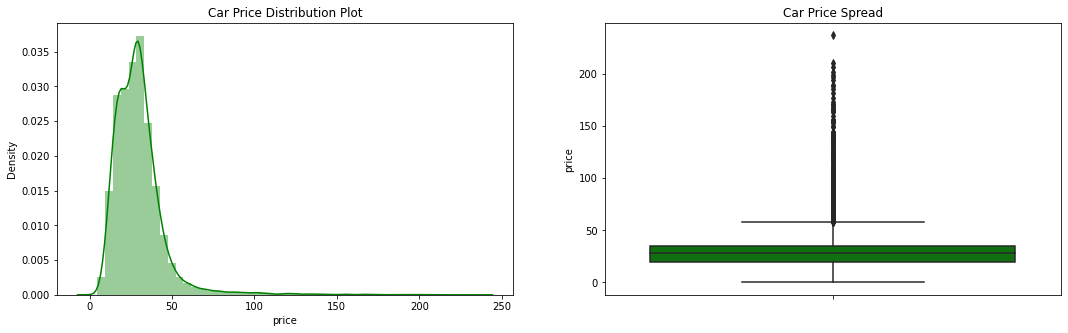

In [8]:
plt.figure(figsize = (18, 5))

# bieu do the hien phan bo gia cua cac dong xe
plt.subplot(1, 2, 1)
plt.title('Car Price Distribution Plot')
sns.distplot(dataset.price, color = 'g')

# bieu do boxplot the hien gia cua cac dong xe
plt.subplot(1, 2, 2)
plt.title('Car Price Spread')
sns.boxplot(y = dataset.price, color = 'g')

plt.show()

In [9]:
# tinh toan cac thong ke mo ta cua gia ca

print(dataset.price.describe(percentiles = [0.25, 0.50, 0.75, 0.85, 0.90, 1]))

count    12913.000000
mean        29.864724
std         16.195003
min          0.000000
25%         19.920000
50%         27.990000
75%         35.190000
85%         39.939600
90%         43.879000
100%       237.155000
max        237.155000
Name: price, dtype: float64


**Nhận xét:**
* Biểu đồ lệch phải (lệch về bên trái), có nghĩa là hầu hết các mức giá trong tập dữ liệu đều thấp.
* Có sự khác biệt đáng kể giữa trung bình và trung vị của phân phối giá.
* Các điểm dữ liệu khác xa so với mức trung bình, điều này cho thấy giá xe có sự chênh lệch cao.

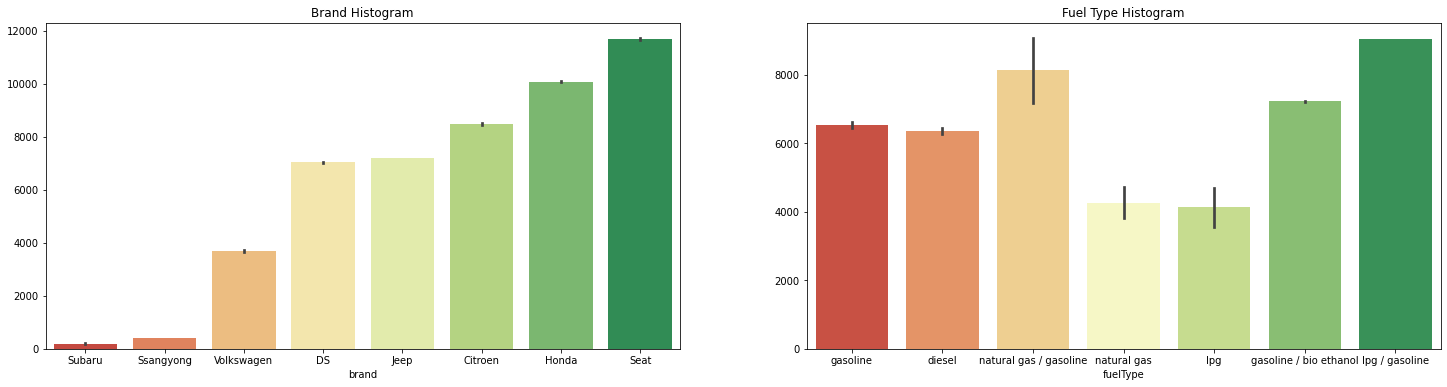

In [10]:
plt.figure(figsize = (25, 6))

# bieu do the hien so luong xe cua tung hang xe
plt.subplot(1, 2, 1)
data_brand = pd.DataFrame(dataset.brand)
data_brand.value_counts()
sns.barplot(x = 'brand', y = data_brand.index, data = data_brand, palette = 'RdYlGn')
plt.title('Brand Histogram')

# bieu do the hien so luong xe cua tung loai nhien lieu
plt.subplot(1, 2, 2)
data_fueltype = pd.DataFrame(dataset.fuelType)
data_fueltype.value_counts()
sns.barplot(x = 'fuelType', y = data_fueltype.index, data = data_fueltype, palette = 'RdYlGn')
plt.title('Fuel Type Histogram')

plt.show()

**Nhận xét:**
* *Seat* là hiệu xe nhiều dòng xe nhiều nhất, sau đó là *Honda*, *Citroen*, *Jeep*, *DS*, *Volkswagen*, *Ssangyong*, và cuối cùng là *Subaru*.
* *Ipg/gasoline* là nhiên liệu được sử dụng nhiều hơn *Diesel*.

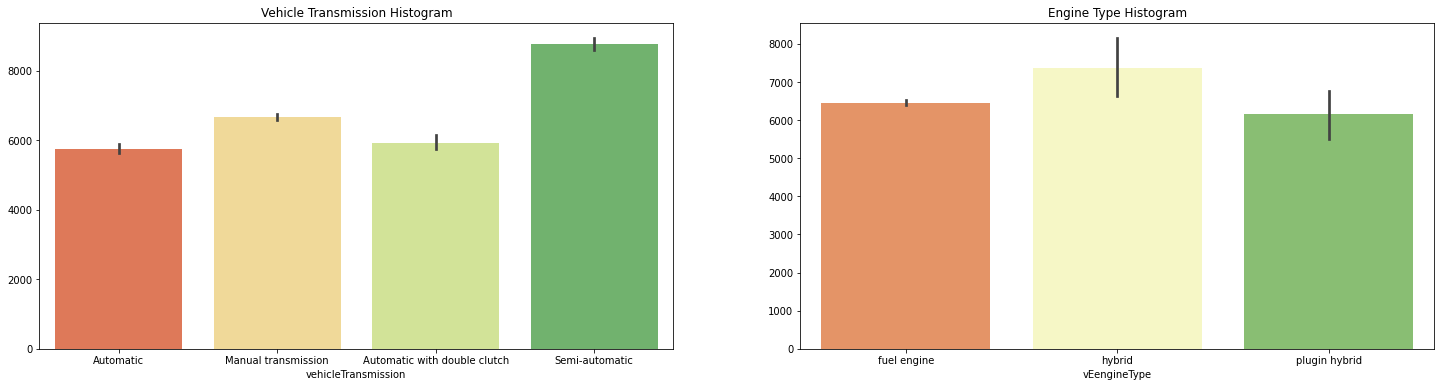

In [11]:
plt.figure(figsize = (25, 6))

# bieu do the hien so luong xe cua tung loai bo phan truyen so
plt.subplot(1, 2, 1)
data_vehiclle = pd.DataFrame(dataset.vehicleTransmission)
data_vehiclle.value_counts()
sns.barplot(x = 'vehicleTransmission', y = data_vehiclle.index, data = data_vehiclle, palette = 'RdYlGn')
plt.title('Vehicle Transmission Histogram')

# bieu do the hien so luong xe cua tung loai dong co
plt.subplot(1, 2, 2)
data_vEengine = pd.DataFrame(dataset.vEengineType)
data_vEengine.value_counts()
sns.barplot(x = 'vEengineType', y = data_vEengine.index, data = data_vEengine, palette = 'RdYlGn')
plt.title('Engine Type Histogram')

plt.show()

**Nhận xét:**
* *Semi-automatic* là loại bộ phận truyền số được sử dụng trên nhiều dòng xe.
* *Hybrid* là loại động cơ được sử dụng trên nhiều dòng xe hơn *plugin hybrid* hay *fuel engine*.

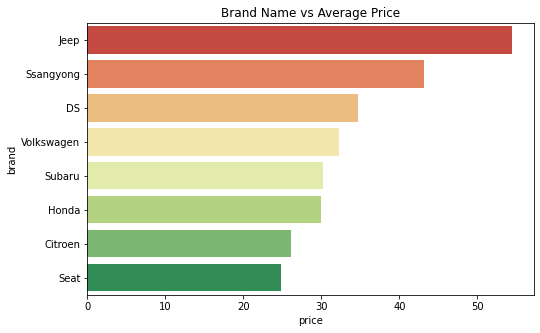

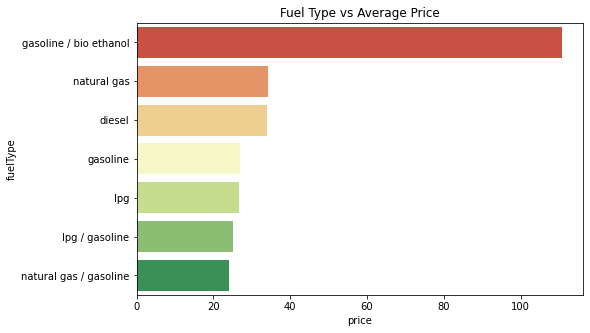

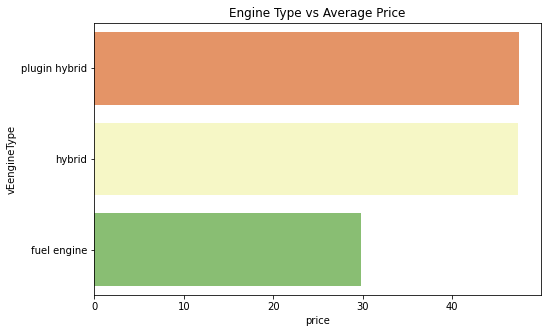

In [12]:
# bieu do the hien tung hang xe voi trung binh ve gia
plt.figure(figsize = (8, 5))
data_brand_price = pd.DataFrame(dataset.groupby(['brand'])['price'].mean().sort_values(ascending = False))
sns.barplot(x = 'price', y = data_brand_price.index, data = data_brand_price, palette = 'RdYlGn')
plt.title('Brand Name vs Average Price')
plt.show()

# bieu do the hien tung loai nhien lieu voi trung binh ve gia
plt.figure(figsize = (8, 5))
data_fuel_price = pd.DataFrame(dataset.groupby(['fuelType'])['price'].mean().sort_values(ascending = False))
sns.barplot(x = 'price', y = data_fuel_price.index, data = data_fuel_price, palette = 'RdYlGn')
plt.title('Fuel Type vs Average Price')
plt.show()

# bieu do the hien tung loai dong co voi trung binh ve gia
plt.figure(figsize = (8, 5))
data_engine_price = pd.DataFrame(dataset.groupby(['vEengineType'])['price'].mean().sort_values(ascending = False))
sns.barplot(x = 'price', y = data_engine_price.index, data = data_engine_price, palette = 'RdYlGn')
plt.title('Engine Type vs Average Price')
plt.show()

**Nhận xét:**
* *Jeep* dường như có giá trung bình so với giá cả là cao nhất.
* *Gasoline/ bio ethanol* có giá bình quân cao hơn các loại khác.
* *Plugin hybrid* và *Hybrid* có giá trung bình cao hơn *fuel engine*. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



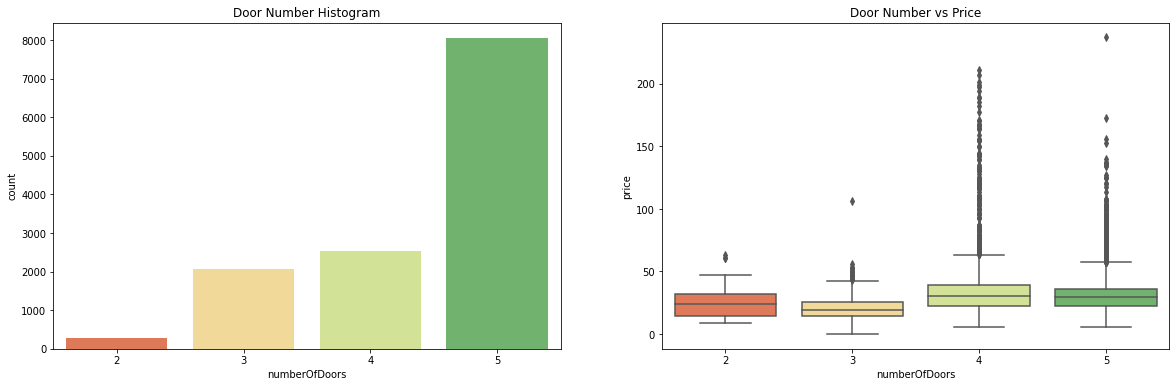

In [13]:
# bieu do the hien moi tuong quan giua so luong cua xe voi gia

plt.figure(figsize = (20, 6))

plt.subplot(1, 2, 1)
plt.title('Door Number Histogram')
sns.countplot(dataset.numberOfDoors, palette = 'RdYlGn')

plt.subplot(1, 2, 2)
plt.title('Door Number vs Price')
sns.boxplot(x = dataset.numberOfDoors, y = dataset.price, palette = 'RdYlGn')

plt.show()

**Nhận xét:**
* *Number of doors* không ảnh hưởng nhiều đến giá, nó không có sự khác biệt đáng kể giữa các danh mục.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



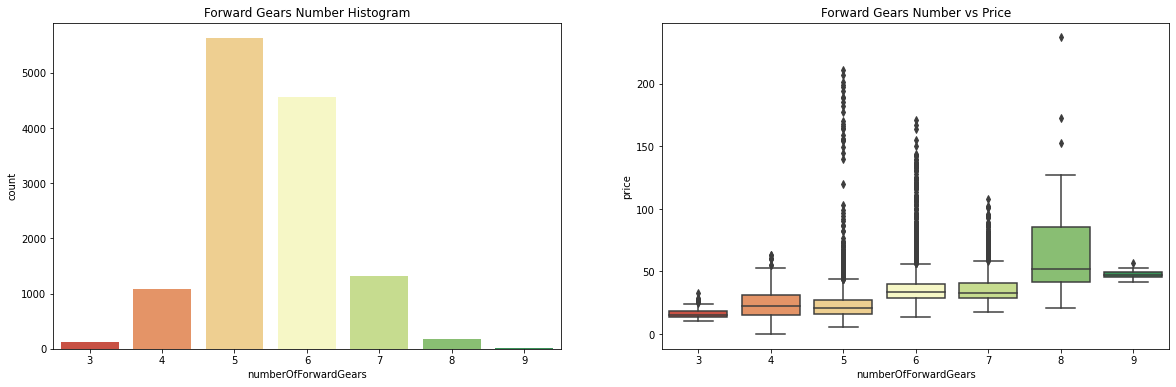

In [15]:
# bieu do the hien moi tuong quan giua so luong truc banh rang voi gia

plt.figure(figsize = (20, 6))

plt.subplot(1, 2, 1)
plt.title('Forward Gears Number Histogram')
sns.countplot(dataset.numberOfForwardGears, palette = 'RdYlGn')

plt.subplot(1, 2, 2)
plt.title('Forward Gears Number vs Price')
sns.boxplot(x = dataset.numberOfForwardGears, y = dataset.price, palette = 'RdYlGn')

plt.show()

**Nhận xét:**
* Tương tự như *Number of doors*, *Number of forward gears* không có sự khác biệt đáng kể giữa các danh mục.

Text(0.5, 0, 'weightTotal')

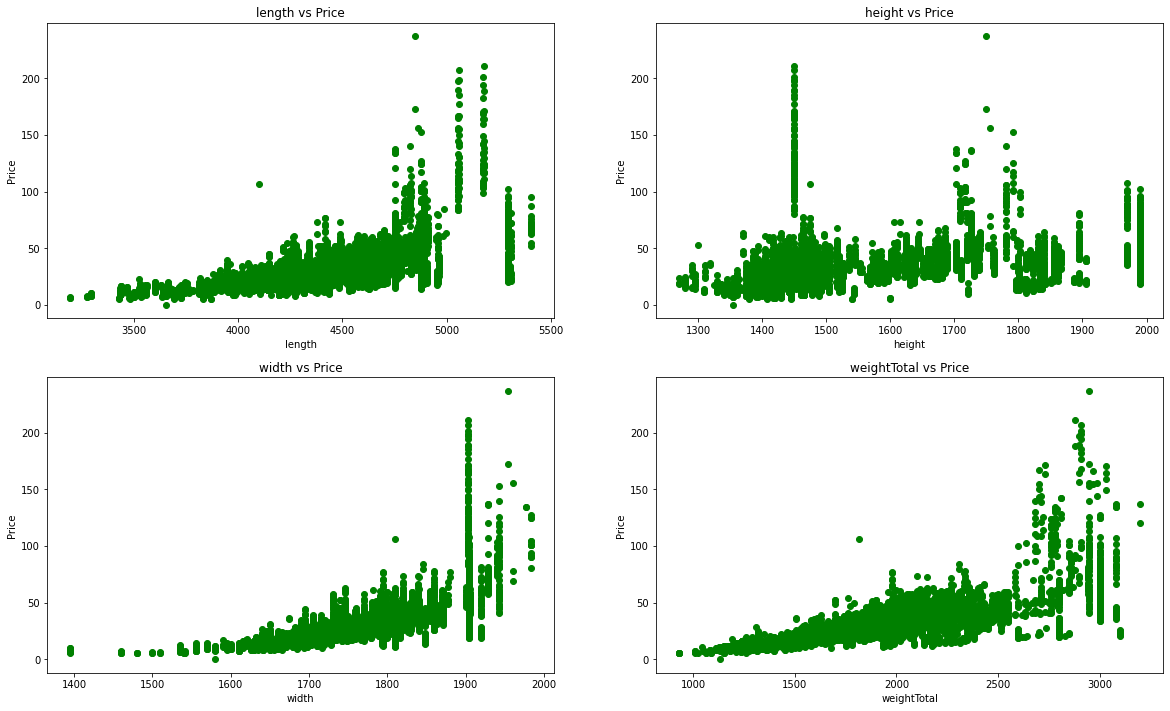

In [16]:
plt.figure(figsize = (20, 25))

# bieu do the hien moi tuong quan giua chieu dai voi gia
plt.subplot(4, 2, 1)
plt.scatter(dataset['length'], dataset['price'], color = 'g')
plt.title('length vs Price')
plt.ylabel('Price')
plt.xlabel('length')

# bieu do the hien moi tuong quan giua chieu cao voi gia
plt.subplot(4, 2, 2)
plt.scatter(dataset['height'], dataset['price'], color = 'g')
plt.title('height vs Price')
plt.ylabel('Price')
plt.xlabel('height')

# bieu do the hien moi tuong quan giua chieu rong voi gia
plt.subplot(4, 2, 3)
plt.scatter(dataset['width'], dataset['price'], color = 'g')
plt.title('width vs Price')
plt.ylabel('Price')
plt.xlabel('width')

# bieu do the hien moi tuong quan giua trong luong voi gia
plt.subplot(4, 2, 4)
plt.scatter(dataset['weightTotal'], dataset['price'], color = 'g')
plt.title('weightTotal vs Price')
plt.ylabel('Price')
plt.xlabel('weightTotal')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



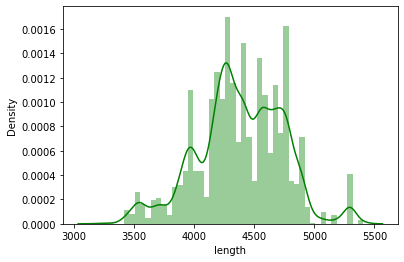

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



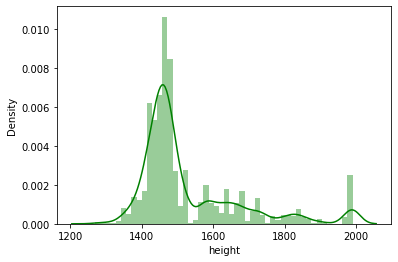

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



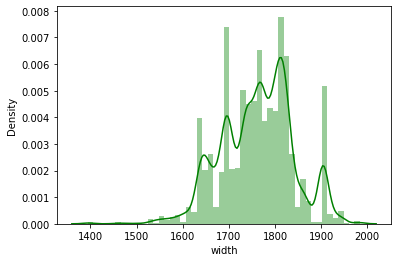

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



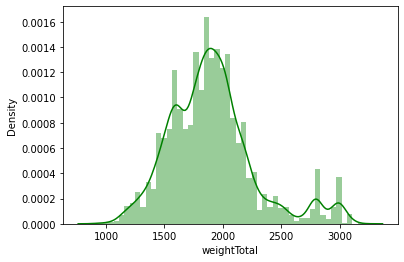

In [17]:
# bieu do the hien moi tuong quan giua chieu dai voi gia
sns.distplot(dataset['length'], color = 'g')
plt.show()

# bieu do the hien moi tuong quan giua chieu cao voi gia
sns.distplot(dataset['height'], color = 'g')
plt.show()

# bieu do the hien moi tuong quan giua chieu rong voi gia
sns.distplot(dataset['width'], color = 'g')
plt.show()

# bieu do the hien moi tuong quan giua trong luong voi gia
sns.distplot(dataset['weightTotal'], color = 'g')
plt.show()

**Nhận xét:**
* *width*, *length* và *weight* có mối tương quan với giá cả.
* *height* không ảnh hưởng và phụ thuộc với giá.

In [18]:
# he so tuong quan

np.corrcoef(dataset['length'], dataset['width'])[0, 1]

0.7885956779673042

**Nhận xét:**
* Hệ số tương quan giữa *length* và *width* là 0,7886, điều này biểu thị 2 đối số có mối quan hệ chặt chẽ.

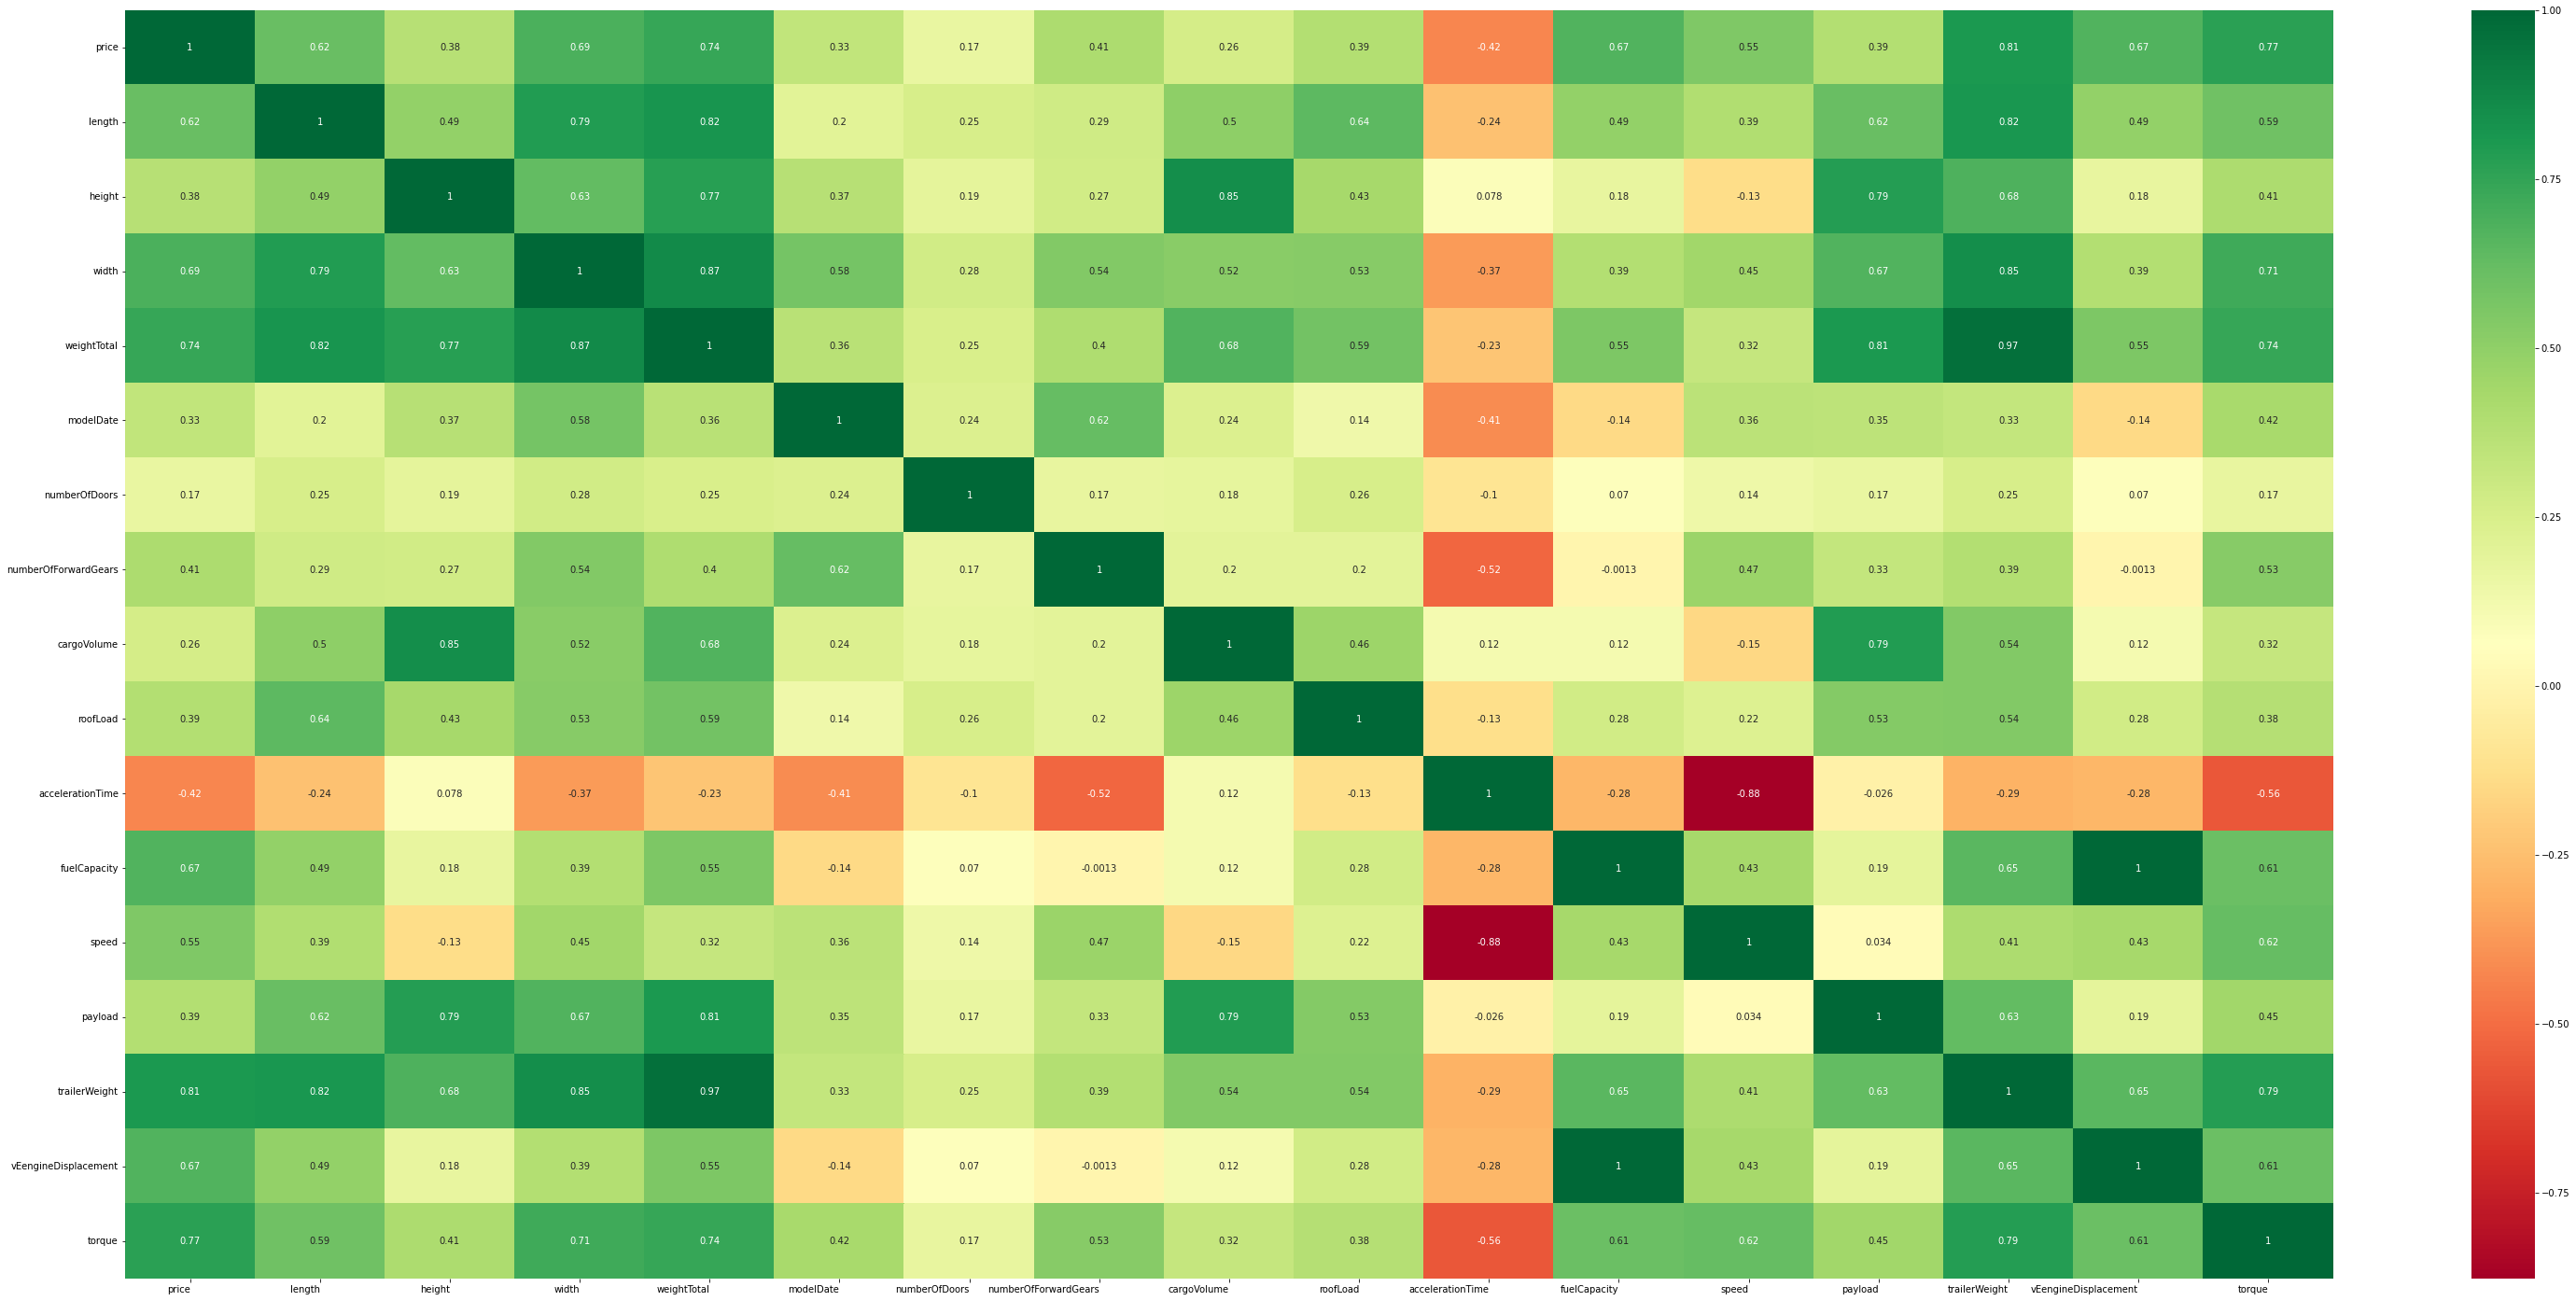

In [19]:
# tong the cac thuoc tinh tuong quan

dataset.corr()
fig, ax = plt.subplots(figsize = (53, 25)) 
sns.heatmap(dataset.corr(), annot = True, cmap = 'RdYlGn')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 0, horizontalalignment = 'right');

**Nhận xét:**
* Các biến có tương quan cao so với giá cả là - *weightTotal*, *trailerWeight*, *torque*.

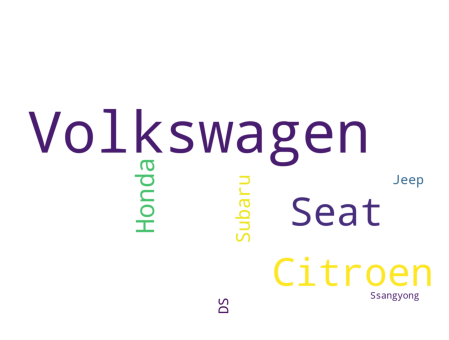

In [20]:
data_brand = pd.Series(dataset.brand).value_counts()

draw = wc.WordCloud(background_color = 'white', margin = 20, width = 800, 
                    height = 600, prefer_horizontal = 0.7, max_words = 20, scale = 2)
draw.generate_from_frequencies(data_brand)
f, ax = plt.subplots(figsize = (10, 6))
plt.axis('off')
plt.imshow(draw)
plt.show()

**Nhận xét:**
* *Volkswagen* chiếm ưu thế hơn cả.

In [25]:
# bieu do tuong quan giua toc do va trong luong cua xe

fig = px.scatter(dataset, x = 'weightTotal', y = 'speed', size = 'price', color = 'brand', animation_frame = 'modelDate', 
                                animation_group = 'name', hover_name = 'name', size_max = 60)         
fig.show()

In [24]:
# bieu do tuong quan giua luong nhien lieu va trong luong cua xe

fig = px.scatter(dataset, x = 'weightTotal', y = 'fuelCapacity', size = 'price', color = 'brand', animation_frame = 'modelDate', 
                                animation_group = 'name', hover_name = 'name', size_max = 60)         
fig.show()